In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

In [2]:
# bring in csv files
food_security_hh = "data/data-EFK41.csv"
obesity_file = "data/data-xeuft.csv"
grand_food_security_file = "data/data-XVKxd.csv"

food_security_df = pd.read_csv(food_security_hh)
obesity_df = pd.read_csv(obesity_file)
grand_food_security_df = pd.read_csv(grand_food_security_file)

# Need to split the county/state to be able to merge then narrow the dataframes
# Splitting Columns - https://sparkbyexamples.com/pandas/pandas-split-column/#:~:text=the%20split()%20function%20is,Dataframe%20columns%2C%20whereas%20the%20Series.
# How to rename the column - https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/
food_security_df[['County', 'State']] = food_security_df.NAME_E.str.split(",", expand = True)
obesity_df[['County', 'State']] = obesity_df.Geography.str.split(",", expand = True)

# Rename the one column for easier manipulation
grand_food_security_df.rename(columns = {'County, State':'county_state'}, inplace = True)
grand_food_security_df[['County', 'State']] = grand_food_security_df.county_state.str.split(",", expand = True)

# Dropping all unneeded columns
food_security_df.drop(columns=['NAME_E'],inplace=True, axis=1)
obesity_df.drop(columns=['FIPS', 'Column 1.1','Column 1.2','Column 1.3','Adult Obesity (2017)','Adult Obesity (2016)','Adult Obesity (2015)','Adult Obesity (2014)','Geography'],inplace=True, axis=1)
grand_food_security_df.drop(columns=['FIPS', 'county_state'],inplace=True, axis=1)


# Isolating all Georgia information
georgia_food_security_df = food_security_df.loc[food_security_df['State']==' Georgia']
ga_obesity_df = obesity_df.loc[obesity_df['State']==' GA']
georgia_grand_food_security_df = grand_food_security_df.loc[grand_food_security_df['State']==' Georgia']

# Replacing Georgia with GA for merging purposes
ga_food_security_df=georgia_food_security_df.replace(' Georgia',' GA')
ga_grand_food_security_df=georgia_grand_food_security_df.replace(' Georgia',' GA')

#Merging the dfs one by one
food_security_pt1 = pd.merge(ga_food_security_df, ga_obesity_df, how = "inner", on=["State", "County"])
ga_food_security_complete = pd.merge(ga_food_security_df, ga_grand_food_security_df, how = "inner", on=["State", "County"])
ga_food_security_complete.head()

,Households,Food Security Rate,Food Insecurity Rate_x,Region,Median HH income,County,State,Food Insecurity Rate_y,2018 Food Insecurity Rate,# of Food Insecure Persons in 2018,...,High Threshold Type,% FI ≤ Low Threshold,% FI Btwn Thresholds,% FI &gt; High Threshold,2018 Child food insecurity rate,# of Food Insecure Children in 2018,% food insecure children in HH w/ HH incomes below 185 FPL in 2018,% food insecure children in HH w/ HH incomes above 185 FPL in 2018,2018 Cost Per Meal,2018 Weighted Annual Food Budget Shortfall
0,6682.0,84.3,15.7,South,39561.0,Appling County,GA,15.7,0.16,2900.0,...,Other Nutrition Program,63.4%,18.3%,18.4%,21.9%,"1,010",94%,6%,$2.88,1414000
1,2785.0,84.2,15.8,South,34877.0,Atkinson County,GA,15.8,0.16,1300.0,...,Other Nutrition Program,64.7%,22.3%,13.0%,24.4%,550,88%,12%,$2.84,626000
2,3966.0,83.2,16.8,South,36964.0,Bacon County,GA,16.8,0.17,1880.0,...,Other Nutrition Program,55.8%,20.2%,24.0%,23.7%,680,86%,14%,$2.81,894000
3,1385.0,82.7,17.3,South,37188.0,Baker County,GA,17.3,0.17,550.0,...,Other Nutrition Program,53.9%,32.2%,13.9%,20.2%,130,73%,27%,$3.05,284000
4,16122.0,83.3,16.7,South,39426.0,Baldwin County,GA,16.7,0.17,7540.0,...,Other Nutrition Program,65.6%,8.4%,26.0%,22.9%,"2,000",57%,43%,$2.82,3598000


In [3]:
# Rename and drop Fields and copy the existing df to new df --jinny

ga_food_security_complete.rename(columns={
'Households': '#_Households_Per_County',
 'Food Security Rate': 'Food_Security_Rate',
'Food Insecurity Rate_x': 'Food_Insecurity_Rate',
'Region': 'Region',
'Median HH income': 'Median_HH_income',
'County': 'County',
'State': 'State',
'Food Insecurity Rate_y': 'Food_Insecurity_Rate_y',
'2018 Food Insecurity Rate': '2018_Food_Insecurity_Rate',
'# of Food Insecure Persons in 2018': '#_of_Food_ Insecure_ Persons',
'...': '...',
'High Threshold Type': 'High_Threshold_Type',
'% FI ≤ Low Threshold': '%_FI_≤_Low_Threshold',
'% FI Btwn Thresholds': '%_FI_Btwn_Thresholds',
'% FI &gt; High Threshold': '%_FI_&gt_High_Threshold',
'2018 Child food insecurity rate': '2018_Child_food_insecurity_rate',
'# of Food Insecure Children in 2018': '#_of_Food_Insecure_Children_in_2018',
'% food insecure children in HH w/ HH incomes below 185 FPL in 2018': '%_food_insecure_children_in_HH_w/HH_incomes_below_185_FPL_in_2018',
'% food insecure children in HH w/ HH incomes above 185 FPL in 2018': '%_food_insecure_children_in_HH_w/HH_incomes_above_185_FPL_in_2018',
'2018 Cost Per Meal': '2018_Cost_Per_Meal',
'2018 Weighted Annual Food Budget Shortfall': '2018_Weighted_Annual_Food_Budget_Shortfall'
}, inplace=True)   
ga_food_security_complete.head()

,#_Households_Per_County,Food_Security_Rate,Food_Insecurity_Rate,Region,Median_HH_income,County,State,Food_Insecurity_Rate_y,2018_Food_Insecurity_Rate,#_of_Food_ Insecure_ Persons,...,High_Threshold_Type,%_FI_≤_Low_Threshold,%_FI_Btwn_Thresholds,%_FI_&gt_High_Threshold,2018_Child_food_insecurity_rate,#_of_Food_Insecure_Children_in_2018,%_food_insecure_children_in_HH_w/HH_incomes_below_185_FPL_in_2018,%_food_insecure_children_in_HH_w/HH_incomes_above_185_FPL_in_2018,2018_Cost_Per_Meal,2018_Weighted_Annual_Food_Budget_Shortfall
0,6682.0,84.3,15.7,South,39561.0,Appling County,GA,15.7,0.16,2900.0,...,Other Nutrition Program,63.4%,18.3%,18.4%,21.9%,"1,010",94%,6%,$2.88,1414000
1,2785.0,84.2,15.8,South,34877.0,Atkinson County,GA,15.8,0.16,1300.0,...,Other Nutrition Program,64.7%,22.3%,13.0%,24.4%,550,88%,12%,$2.84,626000
2,3966.0,83.2,16.8,South,36964.0,Bacon County,GA,16.8,0.17,1880.0,...,Other Nutrition Program,55.8%,20.2%,24.0%,23.7%,680,86%,14%,$2.81,894000
3,1385.0,82.7,17.3,South,37188.0,Baker County,GA,17.3,0.17,550.0,...,Other Nutrition Program,53.9%,32.2%,13.9%,20.2%,130,73%,27%,$3.05,284000
4,16122.0,83.3,16.7,South,39426.0,Baldwin County,GA,16.7,0.17,7540.0,...,Other Nutrition Program,65.6%,8.4%,26.0%,22.9%,"2,000",57%,43%,$2.82,3598000


In [4]:
# drop tthe columns ()'Region','Food Insecurity Rate_y','2018 Food Insecurity Rate') and rename the df 
#df.drop(["Courses", "Fee"], axis = 1, inplace=True)
ga_food_security_main = ga_food_security_complete.drop(["Region", "Food_Insecurity_Rate_y", "2018_Food_Insecurity_Rate"], axis=1) 

ga_food_security_main.to_csv("data\consolidated_food_security_data.csv")
ga_food_security_main

,#_Households_Per_County,Food_Security_Rate,Food_Insecurity_Rate,Median_HH_income,County,State,#_of_Food_ Insecure_ Persons,Low Threshold in state,Low Threshold Type,High Threshold in state,High_Threshold_Type,%_FI_≤_Low_Threshold,%_FI_Btwn_Thresholds,%_FI_&gt_High_Threshold,2018_Child_food_insecurity_rate,#_of_Food_Insecure_Children_in_2018,%_food_insecure_children_in_HH_w/HH_incomes_below_185_FPL_in_2018,%_food_insecure_children_in_HH_w/HH_incomes_above_185_FPL_in_2018,2018_Cost_Per_Meal,2018_Weighted_Annual_Food_Budget_Shortfall
0,6682.0,84.3,15.7,39561.0,Appling County,GA,2900.0,130%,SNAP,185%,Other Nutrition Program,63.4%,18.3%,18.4%,21.9%,"1,010",94%,6%,$2.88,1414000
1,2785.0,84.2,15.8,34877.0,Atkinson County,GA,1300.0,130%,SNAP,185%,Other Nutrition Program,64.7%,22.3%,13.0%,24.4%,550,88%,12%,$2.84,626000
2,3966.0,83.2,16.8,36964.0,Bacon County,GA,1880.0,130%,SNAP,185%,Other Nutrition Program,55.8%,20.2%,24.0%,23.7%,680,86%,14%,$2.81,894000
3,1385.0,82.7,17.3,37188.0,Baker County,GA,550.0,130%,SNAP,185%,Other Nutrition Program,53.9%,32.2%,13.9%,20.2%,130,73%,27%,$3.05,284000
4,16122.0,83.3,16.7,39426.0,Baldwin County,GA,7540.0,130%,SNAP,185%,Other Nutrition Program,65.6%,8.4%,26.0%,22.9%,"2,000",57%,43%,$2.82,3598000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,36043.0,88.3,11.7,46970.0,Whitfield County,GA,12170.0,130%,SNAP,185%,Other Nutrition Program,47.7%,40.4%,12.0%,15.4%,"4,220",100%,0%,$2.88,5935000
155,2606.0,84.6,15.4,36077.0,Wilcox County,GA,1360.0,130%,SNAP,185%,Other Nutrition Program,45.4%,19.8%,34.8%,21.5%,360,84%,16%,$3.00,691000
156,3879.0,83.2,16.8,35106.0,Wilkes County,GA,1660.0,130%,SNAP,185%,Other Nutrition Program,63.3%,20.1%,16.6%,26.1%,540,66%,35%,$3.36,943000
157,3237.0,83.9,16.1,37583.0,Wilkinson County,GA,1470.0,130%,SNAP,185%,Other Nutrition Program,58.8%,13.0%,28.2%,23.1%,480,63%,37%,$2.96,736000


In [5]:
# Visualize one thing and make the data  availble in the dataFrame --jinny
# only using the following fields and also removing '% and ',' from #_of_Food_Insecure_Children_in_2018 2018_Child_food_insecurity_rate
Num_HH_Per_County = ga_food_security_main['#_Households_Per_County']
Food_Insecurity_Rate_Adult =  ga_food_security_main['Food_Insecurity_Rate']
County = ga_food_security_main['County']
Num_of_Food_Insecure_PPL_Adult= ga_food_security_main["#_of_Food_ Insecure_ Persons"]
Food_Insecurity_Rate_Child = ga_food_security_main['2018_Child_food_insecurity_rate'].str.replace("%","")
#Food_Insecurity_Rate_Child
Num_of_Food_Insecure_Children =  ga_food_security_main['#_of_Food_Insecure_Children_in_2018'].str.replace(",","")
#Num_of_Food_Insecure_Children


In [6]:
summary_dfA = pd.DataFrame({'Num_HH_Per_County': Num_HH_Per_County,
                                    'Food_Insecurity_Rate_Adult': Food_Insecurity_Rate_Adult,
                                    'Num_of_Food_Insecure_PPL_Adult' : Num_of_Food_Insecure_PPL_Adult,
                                    'County': County,
                                    'Food_Insecurity_Rate_Child' : Food_Insecurity_Rate_Child,
                                    'Num_of_Food_Insecure_Children' : Num_of_Food_Insecure_Children
                                  
                               })
summary_dfA 

,Num_HH_Per_County,Food_Insecurity_Rate_Adult,Num_of_Food_Insecure_PPL_Adult,County,Food_Insecurity_Rate_Child,Num_of_Food_Insecure_Children
0,6682.0,15.7,2900.0,Appling County,21.9,1010
1,2785.0,15.8,1300.0,Atkinson County,24.4,550
2,3966.0,16.8,1880.0,Bacon County,23.7,680
3,1385.0,17.3,550.0,Baker County,20.2,130
4,16122.0,16.7,7540.0,Baldwin County,22.9,2000
...,...,...,...,...,...,...
154,36043.0,11.7,12170.0,Whitfield County,15.4,4220
155,2606.0,15.4,1360.0,Wilcox County,21.5,360
156,3879.0,16.8,1660.0,Wilkes County,26.1,540
157,3237.0,16.1,1470.0,Wilkinson County,23.1,480


In [7]:
# only using the following fields and also removing '% and ',' from #_of_Food_Insecure_Children_in_2018 2018_Child_food_insecurity_rate
# convert the following two fields to flaod data type
Food_Insecurity_Rate_Child_A = summary_dfA['Food_Insecurity_Rate_Child'].astype(float)
#Food_Insecurity_Rate_Child_A


In [8]:
Num_of_Food_Insecure_Children_A = summary_dfA['Num_of_Food_Insecure_Children'].astype(float)
#Num_of_Food_Insecure_Children_A

In [9]:
summary_dfB = pd.DataFrame({'Num_HH_Per_County': Num_HH_Per_County,
                                    'Food_Insecurity_Rate_Adult': Food_Insecurity_Rate_Adult,
                                    'Num_of_Food_Insecure_PPL_Adult' : Num_of_Food_Insecure_PPL_Adult,
                                    'County': County,
                                    'Food_Insecurity_Rate_Child_A' : Food_Insecurity_Rate_Child_A,
                                    'Num_of_Food_Insecure_Children_A' : Num_of_Food_Insecure_Children_A
                                  
                               })
summary_dfB 

,Num_HH_Per_County,Food_Insecurity_Rate_Adult,Num_of_Food_Insecure_PPL_Adult,County,Food_Insecurity_Rate_Child_A,Num_of_Food_Insecure_Children_A
0,6682.0,15.7,2900.0,Appling County,21.9,1010.0
1,2785.0,15.8,1300.0,Atkinson County,24.4,550.0
2,3966.0,16.8,1880.0,Bacon County,23.7,680.0
3,1385.0,17.3,550.0,Baker County,20.2,130.0
4,16122.0,16.7,7540.0,Baldwin County,22.9,2000.0
...,...,...,...,...,...,...
154,36043.0,11.7,12170.0,Whitfield County,15.4,4220.0
155,2606.0,15.4,1360.0,Wilcox County,21.5,360.0
156,3879.0,16.8,1660.0,Wilkes County,26.1,540.0
157,3237.0,16.1,1470.0,Wilkinson County,23.1,480.0


In [10]:

Num_HH_For_All_County = round(summary_dfB["Num_HH_Per_County"].sum())
#Num_HH_For_All_County


# Count the number of counties in Georgia : 159 counties 
County_counts = summary_dfB["County"].count()
#County_counts


# Calculate the total Food_Insecurity_Rate for audult  and children for all the couties
Total_Food_Insecurity_Rate_Adult = summary_dfB["Food_Insecurity_Rate_Adult"].sum()
#Total_Food_Insecurity_Rate_Adult
Total_Food_Insecurity_Rate_Child = summary_dfB["Food_Insecurity_Rate_Child_A"].sum()
#Total_Food_Insecurity_Rate_Child

# total number Num_of_Food_Insecure_PPL
Total_Num_of_Food_Insecure_PPL_Adult = round(summary_dfB["Num_of_Food_Insecure_PPL_Adult"].sum())
Total_Num_of_Food_Insecure_For_Children = round(summary_dfB["Num_of_Food_Insecure_Children_A"].sum())

# Calculate the average Food_Insecurity_Rate for audult for all the couties
Avg_Food_Insecurity_Rate_Adult = round(summary_dfB["Food_Insecurity_Rate_Adult"].mean(),2)
# Calculate the average num of food insecured children
Avg_Food_Insecurity_Rate_Child = round(summary_dfB["Food_Insecurity_Rate_Child_A"].mean(),2)

# Calculate the min Food_Insecurity_Rate for audult for all the couties
Min_Food_Insecurity_Rate_Adult = round(summary_dfB["Food_Insecurity_Rate_Adult"].min(),2)
# Calculate the min num of food insecured children
Min_Food_Insecurity_Rate_Child = round(summary_dfB["Food_Insecurity_Rate_Child_A"].min(),2)

# Calculate the max Food_Insecurity_Rate for audult for all the couties
Max_Food_Insecurity_Rate_Adult = round(summary_dfB["Food_Insecurity_Rate_Adult"].max(),2)
# Calculate the max num of food insecured children
Max_Food_Insecurity_Rate_Child = round(summary_dfB["Food_Insecurity_Rate_Child_A"].max(),2)




In [11]:
summary_dfC = pd.DataFrame({        'Childeren V/S Adults Food Insecurity Rate': [Num_HH_For_All_County],
                                    'County_counts': [County_counts],
                                   'Total_Food_Insecurity_Rate_Adult': [Total_Food_Insecurity_Rate_Adult],
                                    'Total_Food_Insecurity_Rate_Child' : [Total_Food_Insecurity_Rate_Child],
                            
                                    'Total_Num_of_Food_Insecure_PPL_Adult' : [Total_Num_of_Food_Insecure_PPL_Adult],
                                    'Total_Num_of_Food_Insecure_For_Children':[Total_Num_of_Food_Insecure_For_Children],
                                    
                                                              
                                    'Min Food_Insecurity Rate For Adult' :[Min_Food_Insecurity_Rate_Adult],
                                    'Min Food Insecurity Rate For Child' : [Min_Food_Insecurity_Rate_Child],
                            
                                    'Avg Food Insecurity Rate For Adult' :[Avg_Food_Insecurity_Rate_Adult],
                                    'Avg Food Insecurity Rate For Child' :[Avg_Food_Insecurity_Rate_Child],
                                   
                                    'Max Food Insecurity Rate For Adult' :[Max_Food_Insecurity_Rate_Adult],
                                    'Max Food Insecurity Rate For Child' :[Max_Food_Insecurity_Rate_Child]
                                    
                               })
summary_dfC

,Childeren V/S Adults Food Insecurity Rate,County_counts,Total_Food_Insecurity_Rate_Adult,Total_Food_Insecurity_Rate_Child,Total_Num_of_Food_Insecure_PPL_Adult,Total_Num_of_Food_Insecure_For_Children,Min Food_Insecurity Rate For Adult,Min Food Insecurity Rate For Child,Avg Food Insecurity Rate For Adult,Avg Food Insecurity Rate For Child,Max Food Insecurity Rate For Adult,Max Food Insecurity Rate For Child
0,3709488,159,2360.8,3292.8,1287430,404720,6.0,7.6,14.85,20.71,24.2,36.8


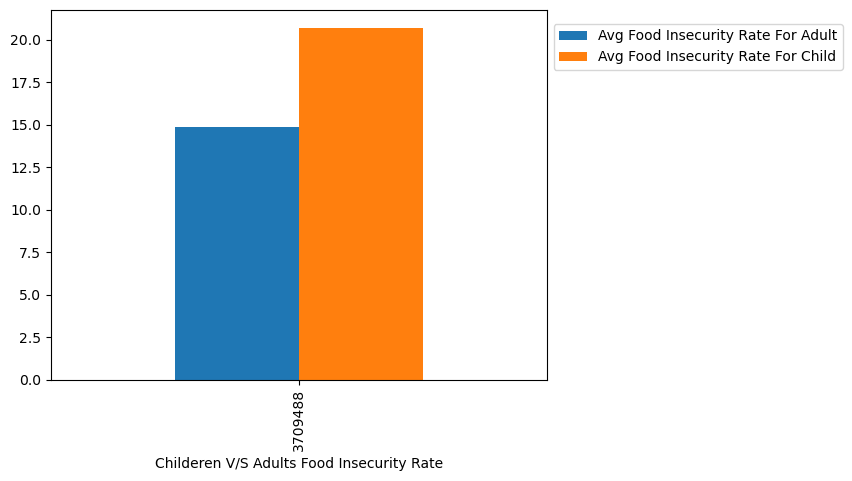

In [12]:
#summary_df01AB.plot(x="GA County", y=["GA CountyHouseHold","GA Total Num of Food Insecure Person"], kind="bar")
summary_dfC.plot(x="Childeren V/S Adults Food Insecurity Rate", y=["Avg Food Insecurity Rate For Adult","Avg Food Insecurity Rate For Child"], kind="bar")
#plt.bar(summary_df1.index.values,summary_df1.values)
#plt.xlabel('County_With_Higest_HH')
#plt.ylabel('Highest_HH_Per_County')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0,0.9))
plt.show()

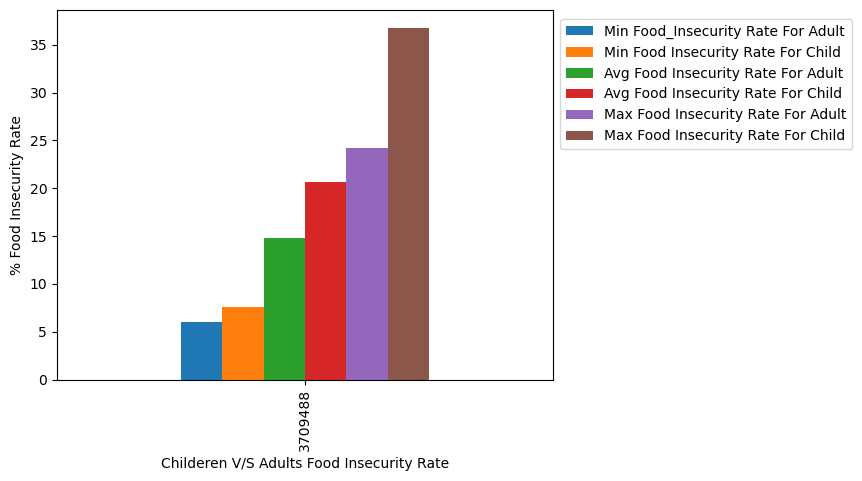

In [13]:
#summary_df01AB.plot(x="GA County", y=["GA CountyHouseHold","GA Total Num of Food Insecure Person"], kind="bar")
summary_dfC.plot(x="Childeren V/S Adults Food Insecurity Rate", y=[ "Min Food_Insecurity Rate For Adult","Min Food Insecurity Rate For Child" ,"Avg Food Insecurity Rate For Adult","Avg Food Insecurity Rate For Child","Max Food Insecurity Rate For Adult","Max Food Insecurity Rate For Child"], kind="bar")
#plt.bar(summary_df1.index.values,summary_df1.values)
#plt.xlabel('County_With_Higest_HH')
#plt.Xlabel('Childeren V/S Adults')
plt.ylabel('% Food Insecurity Rate')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0,0.8))
plt.show()

In [14]:
# Separate out the state and county columns


In [15]:
# Rename Columns

In [16]:
# Get rid of what is not related to GA

In [17]:
# Merge by Counties

In [18]:
# Sahmirah's Visual Block
## ga_food_security_main = combined results 
# Counties with a low threshold over 50% is bad

# Question: Which counties in GA are the most food inseure?

# Count the number of counties in Georgia : 159 counties 
county_count = ga_food_security_main["County"].count()

# Calculate the total households in 2018 : 3 million households
household_count = ga_food_security_main["#_Households_Per_County"].sum()

# Create a new DataFrame for low threshold
low_fi = pd.DataFrame(ga_food_security_main["%_FI_≤_Low_Threshold"])

# Find the statewide average of F.I: 
#state_average = low_fi["%_FI_≤_Low_Threshold"].mean()

# Remove the % character from the data in the column
low_fi["%_FI_≤_Low_Threshold"] = low_fi["%_FI_≤_Low_Threshold"].str.replace("%","")

# Convert the data in the column to the float data type
low_fi["%_FI_≤_Low_Threshold"] = low_fi["%_FI_≤_Low_Threshold"].astype(float)

# Round the DataFrame
low_fi["%_FI_≤_Low_Threshold"] = round(low_fi["%_FI_≤_Low_Threshold"])

# Convert the values to a whole number 
low_fi["%_FI_≤_Low_Threshold"] = low_fi["%_FI_≤_Low_Threshold"].apply(int)

# Filter the DataFrame to include only rows where the value in the column is over 50
low_fi = low_fi[low_fi["%_FI_≤_Low_Threshold"] >= 50]

# Find the statewide average of F.I: 
state_average = low_fi["%_FI_≤_Low_Threshold"].mean()

# Find number of counties over 50% : 104 counties are over 50%
low_fi_count = low_fi.shape[0]

# Find the percentage of counties that are over 50% : 68.5%
low_fi_percent = (low_fi_count / county_count) * 100

print(f'{low_fi_percent} of the counties in Georgia had majority of the population facing food insecurity')

######################

# Create a new DataFrame for low threshold where less then 50% of the county is food insecure
low_fi = pd.DataFrame(ga_food_security_main["%_FI_≤_Low_Threshold"])

# Remove the % character from the data in the column
low_fi["%_FI_≤_Low_Threshold"] = low_fi["%_FI_≤_Low_Threshold"].str.replace("%","")

# Convert the data in the column to the float data type
low_fi["%_FI_≤_Low_Threshold"] = low_fi["%_FI_≤_Low_Threshold"].astype(float)

# Round the DataFrame
low_fi["%_FI_≤_Low_Threshold"] = round(low_fi["%_FI_≤_Low_Threshold"])

# Convert the values to a whole number 
low_fi["%_FI_≤_Low_Threshold"] = low_fi["%_FI_≤_Low_Threshold"].apply(int)

# Filter the DataFrame to include only rows where the value in the column is under 50
little_fi = low_fi[low_fi["%_FI_≤_Low_Threshold"] < 50]

# Find number of counties over 50% : 50 counties are under 50%
little_fi_count = little_fi.shape[0]

# Find the percentage of counties that are under 50% : 31.4%
little_fi_percent = (little_fi_count / county_count) * 100

print(f'{little_fi_percent} of the counties in Georgia had majority of the population not facing food insecurity')
print(f'{state_average} is the state average')


68.55345911949685 of the counties in Georgia had majority of the population facing food insecurity
31.446540880503143 of the counties in Georgia had majority of the population not facing food insecurity
59.3394495412844 is the state average


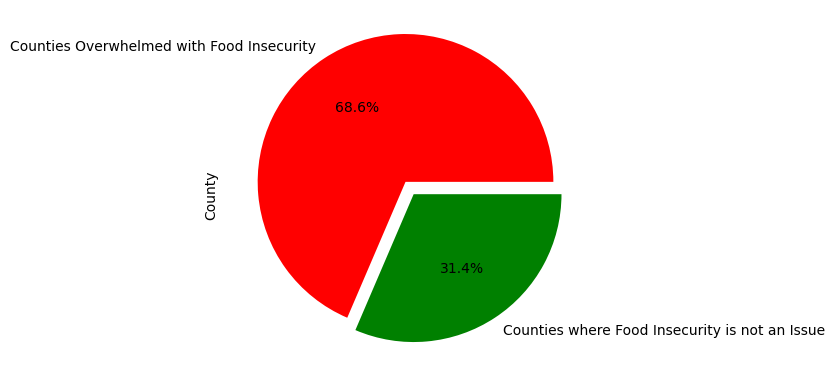

In [19]:
# # Sahmirah's Visual Block 1: Pie Graph 

values = [low_fi_percent, little_fi_percent]
labels = ["Counties Overwhelmed with Food Insecurity", "Counties where Food Insecurity is not an Issue"]
explode = (0.1,0)
colors = ["red", "green"]
plt.pie(values, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.ylabel("County")
plt.show()


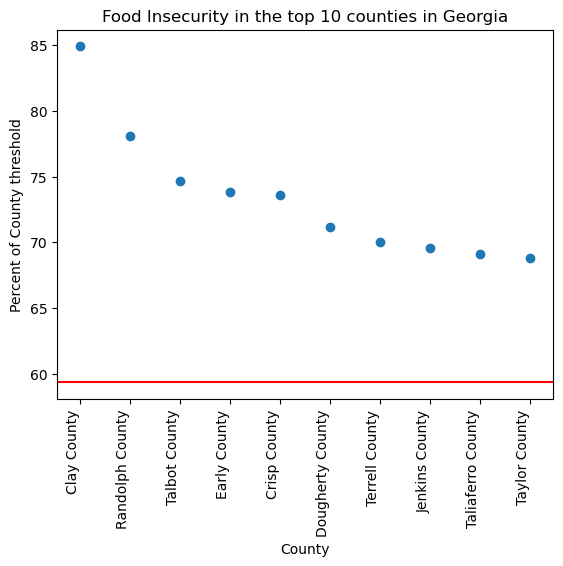

<Figure size 600x300 with 0 Axes>

In [20]:
# Sahmirah's Visual Block 2 : Scatter

# Convert the %_FI_≤_Low_Threshold column to numeric
# Remove the %
ga_food_security_main["%_FI_≤_Low_Threshold"] = pd.to_numeric(ga_food_security_main["%_FI_≤_Low_Threshold"].str.strip("%"))

# Filter the dataframe
ga_food_security_main = ga_food_security_main[ga_food_security_main["%_FI_≤_Low_Threshold"] > 50]

# Sort the dataframe by the "%_FI_≤_Low_Threshold" column in descending order
ga_food_security_main = ga_food_security_main.sort_values(by="%_FI_≤_Low_Threshold", ascending=False)

# Select only the top 10 rows
top_10 = ga_food_security_main.head(10)

# Create the scatter plot
plt.scatter(top_10["County"], top_10["%_FI_≤_Low_Threshold"])

# Add the state average 
plt.axhline(state_average, color="red", label="State Average")

# Add axis labels
plt.xlabel("County")
plt.xticks(rotation=90, ha='right')
plt.ylabel("Percent of County threshold")
plt.title("Food Insecurity in the top 10 counties in Georgia")

plt.figure(figsize=(6,3))

# Show the plot
plt.show()




In [21]:
# Kendall's Visual Block

In [22]:
# Kendall's Visual Block 1

In [23]:
# Kendall's Visual Block 2

The r-squared is 48.63%.


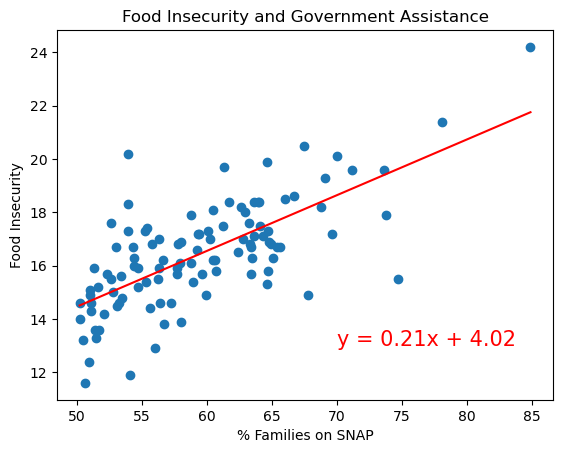

In [24]:
# Bobby's Visual Block
low_threshold_income_rate = ga_food_security_main["%_FI_≤_Low_Threshold"]
food_insecurity_rate = ga_food_security_main["Food_Insecurity_Rate"]

plt.scatter(low_threshold_income_rate,food_insecurity_rate)
plt.xlabel('% Families on SNAP')
plt.ylabel('Food Insecurity')
plt.title('Food Insecurity and Government Assistance')

(slope, intercept, rvalue, pvalue, stderr) = linregress(low_threshold_income_rate, food_insecurity_rate)
regress_values = low_threshold_income_rate * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(low_threshold_income_rate,regress_values,"r-")
plt.annotate(line_eq,(70,13),fontsize=15,color="red")

print(f"The r-squared is {round((rvalue**2)*100,2)}%.")
plt.show()

The r-squared is 60.51%.


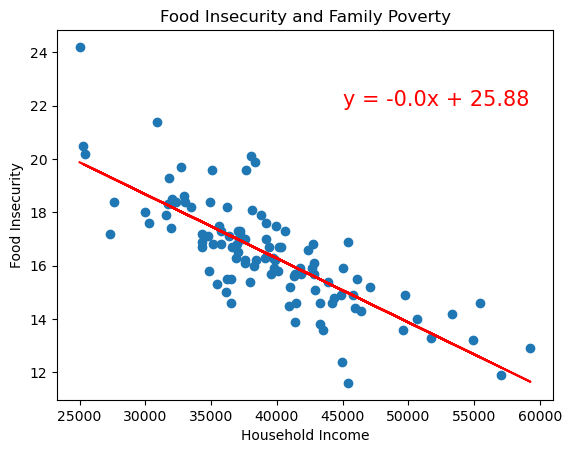

In [25]:
# Bobby's Visual Block 1 
hh_income = ga_food_security_main["Median_HH_income"]

plt.scatter(hh_income,food_insecurity_rate)
plt.xlabel('Household Income')
plt.ylabel('Food Insecurity')
plt.title('Food Insecurity and Family Poverty')

(slope, intercept, rvalue, pvalue, stderr) = linregress(hh_income, food_insecurity_rate)
regress_values = hh_income * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(hh_income,regress_values,"r-")
plt.annotate(line_eq,(45000,22),fontsize=15,color="red")

print(f"The r-squared is {round((rvalue**2)*100,2)}%.")
plt.show()

In [26]:
# Bobby's Visual Block 2